In [120]:
import datetime
import pandas as pd
from pprint import pprint
from src.algorithms.strategy import CvarMretOpt, EqualyWeighted, MeanSemidevOpt, MeanVariance,StochasticDominance
# test data fetching
from src.datasource.yahoodata import YahooDataSource
from src.backtest.backtest import BackTest


In [164]:
tickers = ['MSFT','MMM', 'AXP', 'AMGN', 'AAPL', 'CSCO','IBM','NVDA','TSLA','AMZN','MRK']

column_name = 'Close'
interval = '1d'

start_date = datetime.datetime(2018,2,1)
end_date = datetime.datetime(2024,2,1)
main_data = YahooDataSource(tickers,start_date,end_date,columns=[column_name],interval=interval)
data = main_data.get_data()
main_data.get_data_by_frequency(start_date,end_date,'1d').ffill()

Adding MSFT to the data source
Getting data for MSFT
Adding MMM to the data source
Getting data for MMM
Adding AXP to the data source
Getting data for AXP
Adding AMGN to the data source
Getting data for AMGN
Adding AAPL to the data source
Getting data for AAPL
Adding CSCO to the data source
Getting data for CSCO
Adding IBM to the data source
Getting data for IBM
Adding NVDA to the data source
Getting data for NVDA
Adding TSLA to the data source
Getting data for TSLA
Adding AMZN to the data source
Getting data for AMZN
Adding MRK to the data source
Getting data for MRK


,MSFT,MMM,AXP,AMGN,AAPL,CSCO,IBM,NVDA,TSLA,AMZN,MRK
Date,,,,,,,,,,,
2018-02-02,84.864906,157.058929,87.487541,150.133636,37.716316,32.859055,108.545486,5.774365,22.916668,71.497498,44.898552
2018-02-03,84.864906,157.058929,87.487541,150.133636,37.716316,32.859055,108.545486,5.774365,22.916668,71.497498,44.898552
2018-02-04,84.864906,157.058929,87.487541,150.133636,37.716316,32.859055,108.545486,5.774365,22.916668,71.497498,44.898552
2018-02-05,81.369720,148.263321,83.261612,140.291214,36.774010,31.133003,104.108925,5.284268,22.208668,69.500000,43.242455
2018-02-06,84.448814,149.666214,85.225273,141.816498,38.310856,32.248909,106.026909,5.578031,22.264668,72.141998,42.521736
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-27,400.129547,77.189659,198.562119,300.200592,191.271622,50.209599,178.496262,61.008091,183.250000,159.119995,116.602539
2024-01-28,400.129547,77.189659,198.562119,300.200592,191.271622,50.209599,178.496262,61.008091,183.250000,159.119995,116.602539
2024-01-29,405.865082,77.503273,198.000229,301.818268,190.585739,50.354050,178.229584,62.441547,190.929993,161.259995,117.046486


In [165]:
meanSemidevOpt = MeanSemidevOpt(0.7)
minimumVariance = MeanVariance()
minCvar = CvarMretOpt(1,0.15)


Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              4.302296
Mean Daily Return         0.001343
Mean Yearly Retrun        0.402597
Mean Daily SP500 Return   0.000315
Mean Yearly SP500 Return  0.082727
Std Dev of Daily Return   0.024001
Sharpe Ratio              0.888596
Sortino Ratio             0.975962
Max Drawdown             -0.556488
Calmar Ratio              7.731157
Alpha                     0.000875
Beta                      1.220871


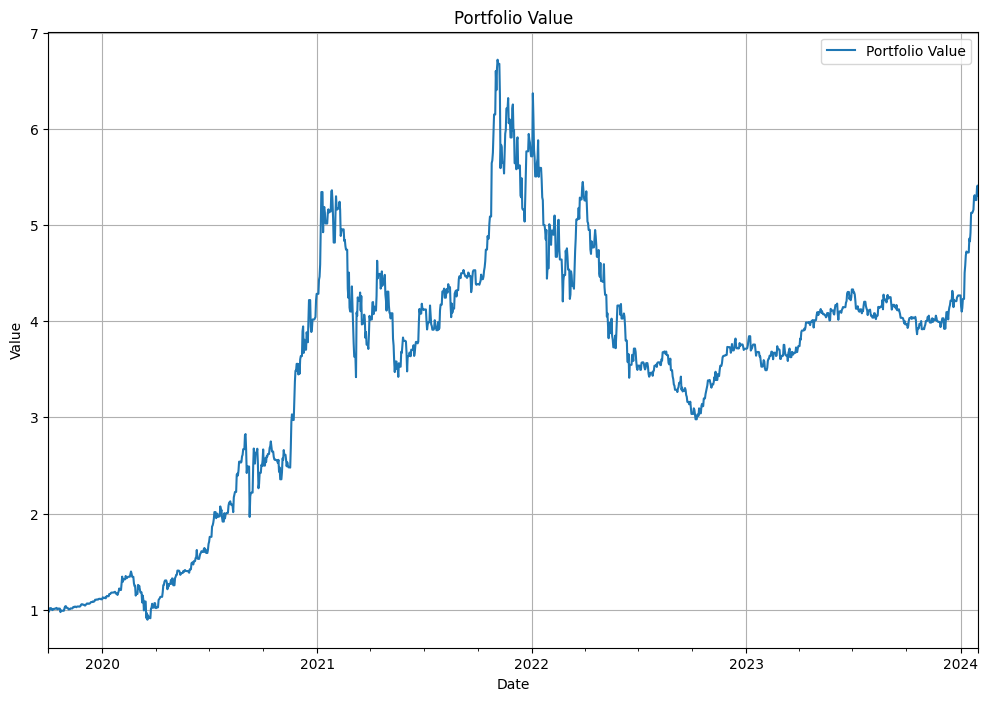

In [166]:

meanSemidevOpt_bt = BackTest(main_data, meanSemidevOpt)
meanSemidevOpt_bt.backtest(start_date, end_date, 20,1, '1MS')
meanSemidevOpt_bt.plot_portfolio_returns()
mean_semi_summary = meanSemidevOpt_bt.get_summary()
print(mean_semi_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              0.844704
Mean Daily Return         0.000448
Mean Yearly Retrun        0.119423
Mean Daily SP500 Return   0.000315
Mean Yearly SP500 Return  0.082727
Std Dev of Daily Return   0.011018
Sharpe Ratio              0.645156
Sortino Ratio             0.683531
Max Drawdown             -0.258519
Calmar Ratio              3.267471
Alpha                     0.000135
Beta                      0.815107


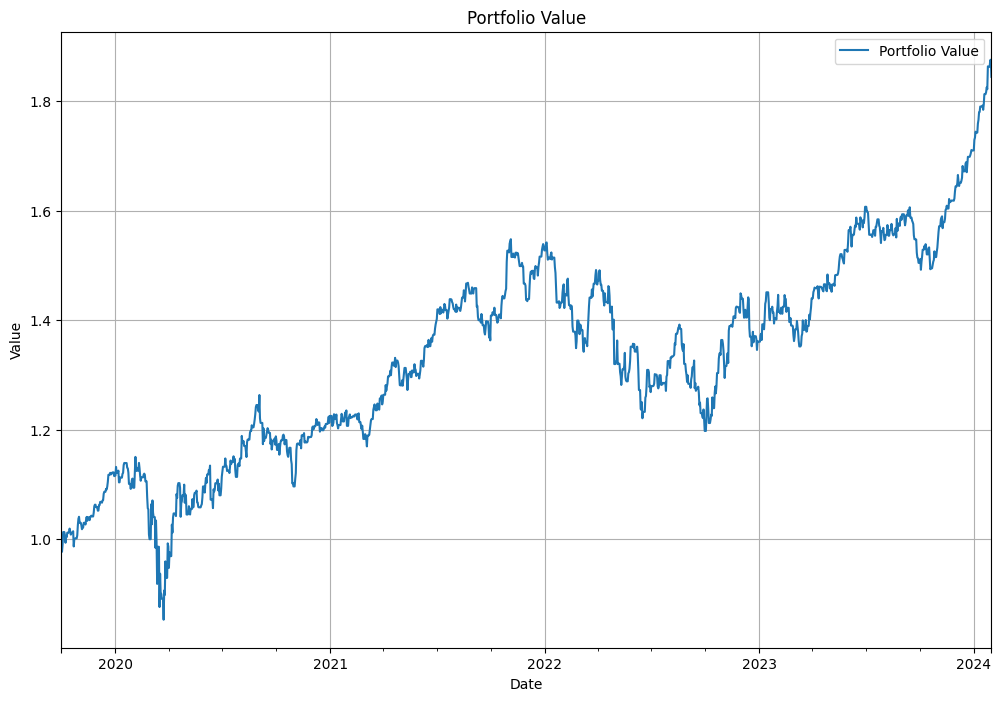

In [167]:
min_var_bt = BackTest(main_data, minimumVariance)
min_var_bt.backtest(start_date, end_date, 20, 1, '1MS')
min_var_bt.plot_portfolio_returns()
min_var_summary = min_var_bt.get_summary()
print(min_var_summary)

Adding ^GSPC to the data source
Getting data for ^GSPC
Adding ^GSPC to the data source
Getting data for ^GSPC
                             Value
Metric                            
Total Return              1.090520
Mean Daily Return         0.000560
Mean Yearly Retrun        0.151505
Mean Daily SP500 Return   0.000315
Mean Yearly SP500 Return  0.082727
Std Dev of Daily Return   0.013698
Sharpe Ratio              0.648953
Sortino Ratio             0.724461
Max Drawdown             -0.267770
Calmar Ratio              4.072607
Alpha                     0.000229
Beta                      0.862995


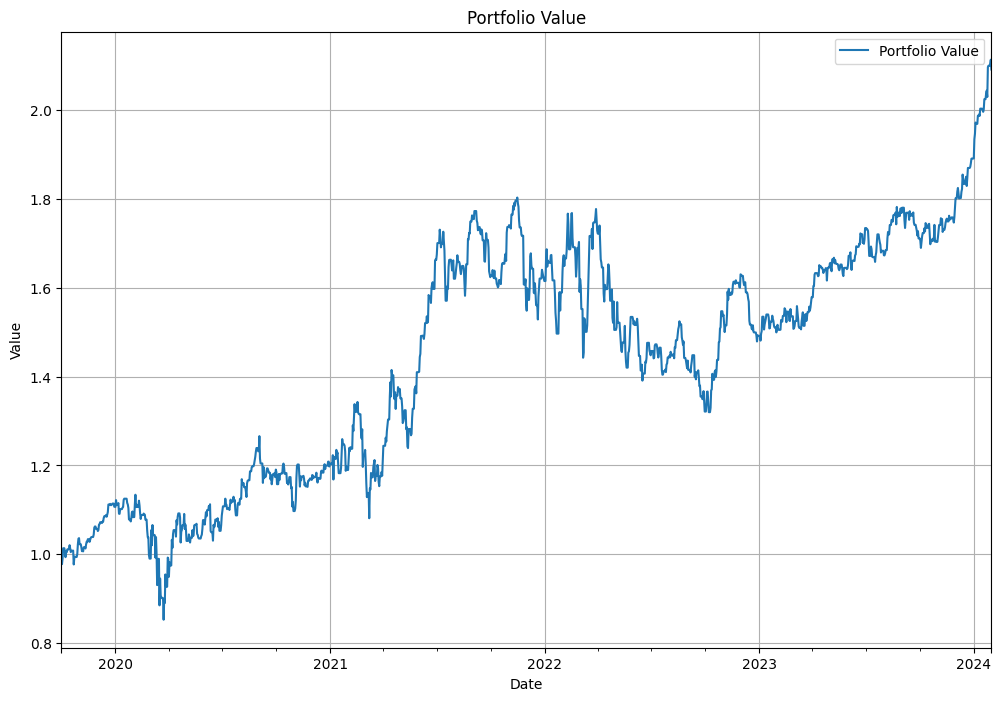

In [168]:
min_cvar_bt = BackTest(main_data, minCvar)
min_cvar_bt.backtest(start_date, end_date, 20, 1, '1MS') 
min_cvar_bt.plot_portfolio_returns()
min_cvar_summary = min_cvar_bt.get_summary()
print(min_cvar_summary)

In [169]:
# Minimum CVaR vs Minimum Variance vs Mean Semideviation vs Equally weighted combined_summary
combined_summary = pd.concat([min_var_summary, min_cvar_summary, mean_semi_summary], axis=1)
combined_summary.columns = ['MinimumVariance', 'MinCvar', 'MeanSemidevOpt']
combined_summary

,MinimumVariance,MinCvar,MeanSemidevOpt
Metric,,,
Total Return,0.844704,1.090520,4.302296
Mean Daily Return,0.000448,0.000560,0.001343
Mean Yearly Retrun,0.119423,0.151505,0.402597
Mean Daily SP500 Return,0.000315,0.000315,0.000315
Mean Yearly SP500 Return,0.082727,0.082727,0.082727
Std Dev of Daily Return,0.011018,0.013698,0.024001
Sharpe Ratio,0.645156,0.648953,0.888596
Sortino Ratio,0.683531,0.724461,0.975962
Max Drawdown,-0.258519,-0.267770,-0.556488


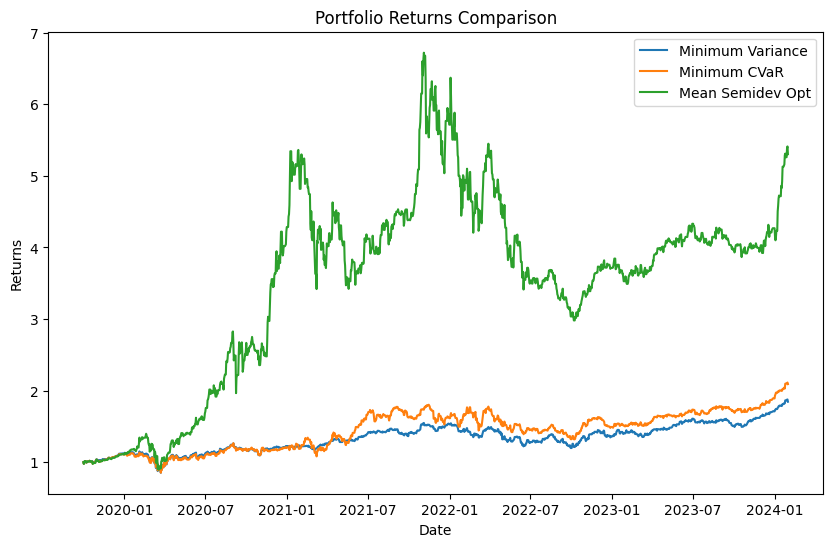

In [171]:
import matplotlib.pyplot as plt 


plt.figure(figsize=(10, 6))
plt.plot(min_var_bt.portfolio_value, label='Minimum Variance')
plt.plot(min_cvar_bt.portfolio_value, label='Minimum CVaR')
plt.plot(meanSemidevOpt_bt.portfolio_value, label='Mean Semidev Opt')
plt.title('Portfolio Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()